In [1]:
import matplotlib.pyplot as plt
import numpy as np
from openbb import obb
import pyfinlib
import logging

# logging.basicConfig(level=logging.DEBUG)
logging.basicConfig(level=logging.INFO)

# Create our portfolio of equities
tickers = ['AAPL','META', 'C', 'DIS', 'CL=F']

# Set the investment weights (I arbitrarily picked for example)
weights = np.array([.1, .1, .1, .1, .6])

# Set an initial investment level
initial_investment = 1000000


In [2]:
data = obb.equity.price.historical(symbol=tickers, start_date="2022-01-01", provider='yfinance')
data.results[0].date, data.results[-1].date

(datetime.date(2022, 1, 3), datetime.date(2025, 6, 20))

In [4]:
portfolio = pyfinlib.Portfolio(
    [
        pyfinlib.PortfolioAsset(.1, "AAPL", 10, [i.close for i in data.results if i.symbol == 'AAPL']),
        pyfinlib.PortfolioAsset(.1, "META", 10, [i.close for i in data.results if i.symbol == 'META']),
        pyfinlib.PortfolioAsset(.1, "C", 10, [i.close for i in data.results if i.symbol == 'C']),
        pyfinlib.PortfolioAsset(.1, "DIS", 10, [i.close for i in data.results if i.symbol == 'DIS']),
        pyfinlib.PortfolioAsset(.6, "CL=F", 10, [i.close for i in data.results if i.symbol == 'CL=F']),
     ]
)

In [10]:
returns = pyfinlib.util.rates_of_change([i.close for i in data.results if i.symbol == 'AAPL'])
aapl_portfolio = pyfinlib.Portfolio(
    [
        pyfinlib.PortfolioAsset(1., "AAPL", 10, [i.close for i in data.results if i.symbol == 'AAPL'])
    ]
)
VaR_historical = aapl_portfolio.value_at_risk_percent(0.05)
VaR_historical_10 = aapl_portfolio.value_at_risk_percent(0.1)
VaR_historical, VaR_historical_10

(-0.03025818849413108, -0.023515219372160088)

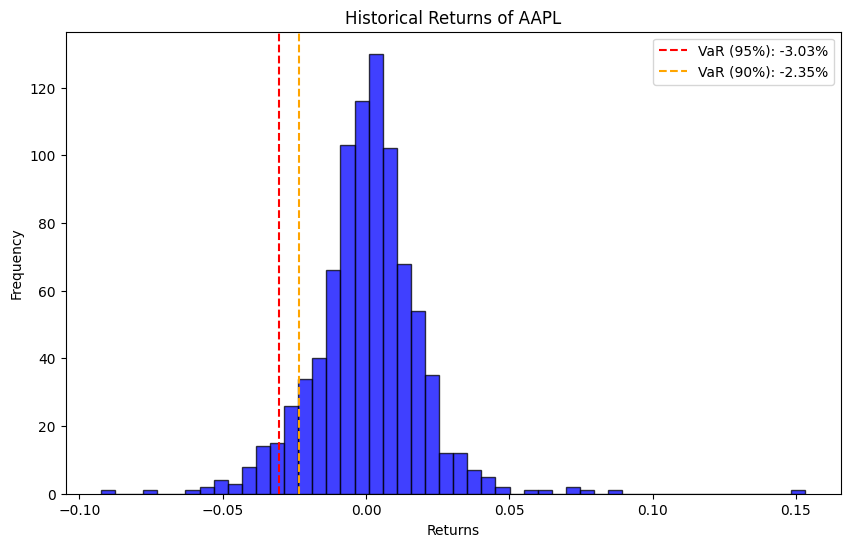

In [11]:
# Plot the historical returns and VaR threshold
plt.figure(figsize=(10, 6))
plt.hist(returns, bins=50, alpha=0.75, color='blue', edgecolor='black')
plt.axvline(VaR_historical, color='red', linestyle='--', label=f'VaR (95%): {VaR_historical:.2%}')
plt.axvline(VaR_historical_10, color='orange', linestyle='--', label=f'VaR (90%): {VaR_historical_10:.2%}')
plt.title('Historical Returns of AAPL')
plt.xlabel('Returns')
plt.ylabel('Frequency')
plt.legend()
plt.show()

In [8]:
value = aapl_portfolio.value_at_risk(0.1, 1_000_000.)
value

23515.219372160034

1 day VaR @ 95% confidence: 23515.0
2 day VaR @ 95% confidence: 33256.0
3 day VaR @ 95% confidence: 40730.0
4 day VaR @ 95% confidence: 47030.0
5 day VaR @ 95% confidence: 52582.0
6 day VaR @ 95% confidence: 57600.0
7 day VaR @ 95% confidence: 62215.0
8 day VaR @ 95% confidence: 66511.0
9 day VaR @ 95% confidence: 70546.0
10 day VaR @ 95% confidence: 74362.0
11 day VaR @ 95% confidence: 77991.0
12 day VaR @ 95% confidence: 81459.0
13 day VaR @ 95% confidence: 84785.0
14 day VaR @ 95% confidence: 87986.0
15 day VaR @ 95% confidence: 91074.0


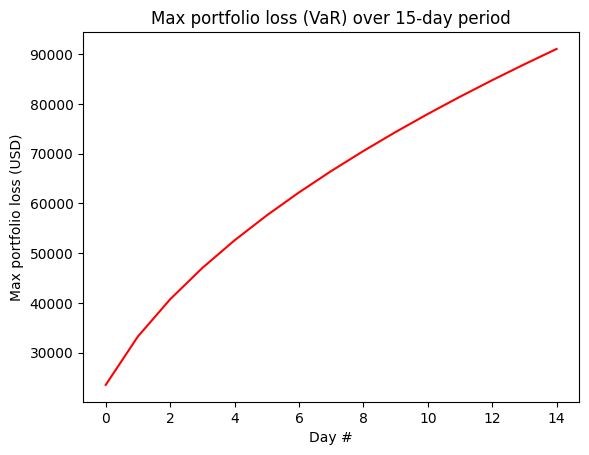

In [9]:
# Calculate n Day VaR
var_array = []
num_days = int(15)
for x in range(1, num_days+1):
    var_array.append(np.round(pyfinlib.risk.value_at_risk.scale_value_at_risk(value, x),2))
    print(str(x) + " day VaR @ 95% confidence: " + str(np.round(pyfinlib.risk.value_at_risk.scale_value_at_risk(value, x))))

# Build plot
plt.xlabel("Day #")
plt.ylabel("Max portfolio loss (USD)")
plt.title(f"Max portfolio loss (VaR) over {num_days}-day period")
plt.plot(var_array, "r")